# 设置CWD

In [2]:
import os
print(os.path.abspath(''))

workspace_path = os.path.abspath('')

# 去到最近的有.git的父目录
while not os.path.exists(os.path.join(workspace_path, '.git')):
    workspace_path = os.path.join(workspace_path, '..')
    if os.path.exists(os.path.join(workspace_path, '.git')):
        break

os.chdir(workspace_path)
print("current working directory: ", os.getcwd())

/home/futou/projects/cumulonimbus/nimbus
current working directory:  /home/futou/projects/cumulonimbus/nimbus


# 直接使用maddness当中的learn maddness代码

In [8]:
import arg_settings
import maddness


# 设定参数
N = 100    # 数据条数
D = 14     # 每条数据的元素数
C = D // 2  # codeblocks的数量
d = D // C  # 每个codeblock的维度
depth = 4  # 决策树深度
K = 2 ** depth  # 桶的数量，二叉树完全二叉树

X = arg_settings.TrainData[:5].numpy()

all_splits_np, all_prototypes, _, thresholds, dims = maddness.learn_proto_and_hash_function(X, C, K=K)


learn_proto_and_hash_function: (5, 14) 7 16
init_and_learn_hash_function: (5, 14) 7 16 start
learn_binary_tree_splits: X.shape:(5, 2), K:16, return_prototypes:False, X_orig is None? False, check_x_dims:8, learn_quantize_params:False
__init__ of Bucket called: bucket_id 0
optimal_split_val of Bucket 0 called: x.shape:(5, 2) 1 x_orig is none? False
optimal_split_val called with X.shape: (5, 2) dim: 1 X_orig is None? False
_cumsses_cols called, X.shape:  (5, 2)
_cumsses_cols called, X.shape:  (5, 2)
optimal_split_val of Bucket 0 called: x.shape:(5, 2) 0 x_orig is none? False
optimal_split_val called with X.shape: (5, 2) dim: 0 X_orig is None? False
_cumsses_cols called, X.shape:  (5, 2)
_cumsses_cols called, X.shape:  (5, 2)
split of Bucket 0 called: x.shape: (5, 2) dim: 1 val: 17.0, X_orig is None? False
__init__ of Bucket called: bucket_id 0
__init__ of Bucket called: bucket_id 1
created empty bucket:  1
optimal_split_val of Bucket 0 called: x.shape:(5, 2) 1 x_orig is none? False
optima

  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    sel

In [9]:
print(all_splits_np.shape, all_prototypes.shape, thresholds.shape, dims.shape)
# thresholds.reshape(-1,15)
dims.reshape(-1,4)

(7, 4, 11) (7, 16, 14) (105,) (28,)


array([[ 1,  1,  1,  1],
       [ 3,  3,  3,  3],
       [ 5,  5,  5,  5],
       [ 7,  7,  7,  7],
       [ 8,  8,  8,  9],
       [11, 11, 11, 11],
       [13, 13, 13, 13]])

In [10]:
# 在all_prototypes当中随机挑选，挑选前两个维度，显示出最后挑选出的向量
import random

pickDim0 = random.randint(0, C-1)
picked0 = all_prototypes[pickDim0]
pickDim1 = random.randint(0, K-1)
picked1 = picked0[pickDim1]
print(picked1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 使用sk learn中的regression

In [11]:
import torch
import torch.nn.functional as F
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# 设定参数
N = 100    # 数据条数
D = 14     # 每条数据的元素数
C = D // 2  # codeblocks的数量
d = D // C  # 每个codeblock的维度
depth = 4  # 决策树深度
K = 2 ** depth  # 桶的数量，二叉树完全二叉树



In [12]:
import arg_settings

X = arg_settings.TrainData

def split_into_codeblocks(X, C, d):
    # 将数据分成C个codeblockPile，每个codeblockPile的维度为(N, d)
    return torch.split(X, d, dim=1)

codeblocks = split_into_codeblocks(X, C, d)
print("codeblocks: \n", codeblocks)

codeblocks: 
 (tensor([[ 5., 17.],
        [ 5., 17.],
        [ 5., 17.],
        ...,
        [ 5., 17.],
        [ 5.,  6.],
        [ 5.,  6.]]), tensor([[ 398.,    0.],
        [ 398.,    0.],
        [ 398.,    0.],
        ...,
        [ 177.,   48.],
        [1500.,    0.],
        [1500.,    0.]]), tensor([[  128.,   378.],
        [  128.,   378.],
        [  128.,   378.],
        ...,
        [  110.,   157.],
        [  128., 64845.],
        [  128., 64845.]]), tensor([[ 398.,  398.],
        [ 398.,  398.],
        [ 398.,  398.],
        ...,
        [ 177.,  129.],
        [2960.,   40.],
        [2960.,   40.]]), tensor([[4.0755e+05, 0.0000e+00],
        [4.5850e+05, 0.0000e+00],
        [5.0944e+05, 0.0000e+00],
        ...,
        [1.9718e+05, 0.0000e+00],
        [1.8628e+06, 5.0000e+00],
        [1.8635e+06, 5.0000e+00]]), tensor([[   0., 1024.],
        [   0., 1152.],
        [   0., 1280.],
        ...,
        [   0., 1344.],
        [   4.,   32.],
        [

In [13]:
def decision_tree_bucketing_enhanced(codeblock, depth, K):
    tree = DecisionTreeRegressor(max_depth=depth)
    indices = np.arange(len(codeblock))
    
    # 训练决策树
    tree.fit(codeblock, indices)
    
    # 分裂特征和阈值
    # 获取特征使用索引和阈值，确保结点是非叶结点
    feature_indices = tree.tree_.feature
    thresholds = tree.tree_.threshold
    non_leaf_nodes = np.where(feature_indices >= 0)[0]

    # 仅保留非叶节点的特征索引和阈值
    dims = feature_indices[non_leaf_nodes]
    threshold = thresholds[non_leaf_nodes]

    # 创建selection_matrix
    d = codeblock.shape[1]
    selection_matrix = torch.zeros((d, len(non_leaf_nodes)))
    for idx, feature_index in enumerate(dims):
        selection_matrix[feature_index, idx] = 1

    return dims, threshold, selection_matrix

# 示例用一个codeblockPile
codeblock_sample = codeblocks[0].numpy()  # 选择第一个codeblock进行处理

dims, threshold, selection_matrix = decision_tree_bucketing_enhanced(codeblock_sample, depth, K)

# 将dims和threshold转换为张量
dims_tensor = torch.tensor(dims)
threshold_tensor = torch.tensor(threshold)


In [14]:
print("selection_matrix: \n", selection_matrix)
print("dims: \n", dims)
print("threshold: \n", threshold)

selection_matrix: 
 tensor([[0.],
        [1.]])
dims: 
 [1]
threshold: 
 [11.5]


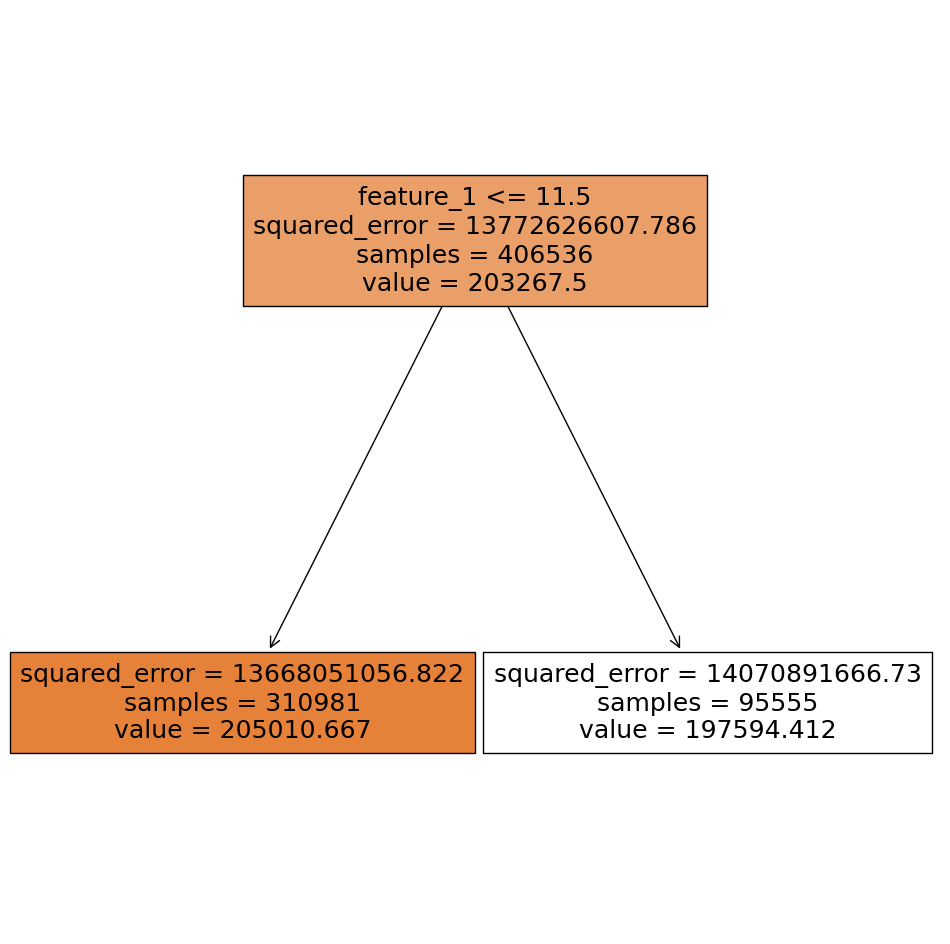

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

codeblock = codeblocks[0]
tree = DecisionTreeRegressor(max_depth=depth)
indices = np.arange(len(codeblock))

# 训练决策树
tree.fit(codeblock, indices)

plt.figure(figsize=(12,12))  # 设置画布大小
plot_tree(tree, filled=True, feature_names=[f'feature_{i}' for i in range(d)])
plt.show()

# 分裂特征和阈值
# 获取特征使用索引和阈值，确保结点是非叶结点
feature_indices = tree.tree_.feature
thresholds = tree.tree_.threshold
non_leaf_nodes = np.where(feature_indices >= 0)[0]

# 仅保留非叶节点的特征索引和阈值
dims = feature_indices[non_leaf_nodes]
threshold = thresholds[non_leaf_nodes]

# 创建selection_matrix
d = codeblock.shape[1]
selection_matrix = torch.zeros((d, len(non_leaf_nodes)))
for idx, feature_index in enumerate(dims):
    selection_matrix[feature_index, idx] = 1


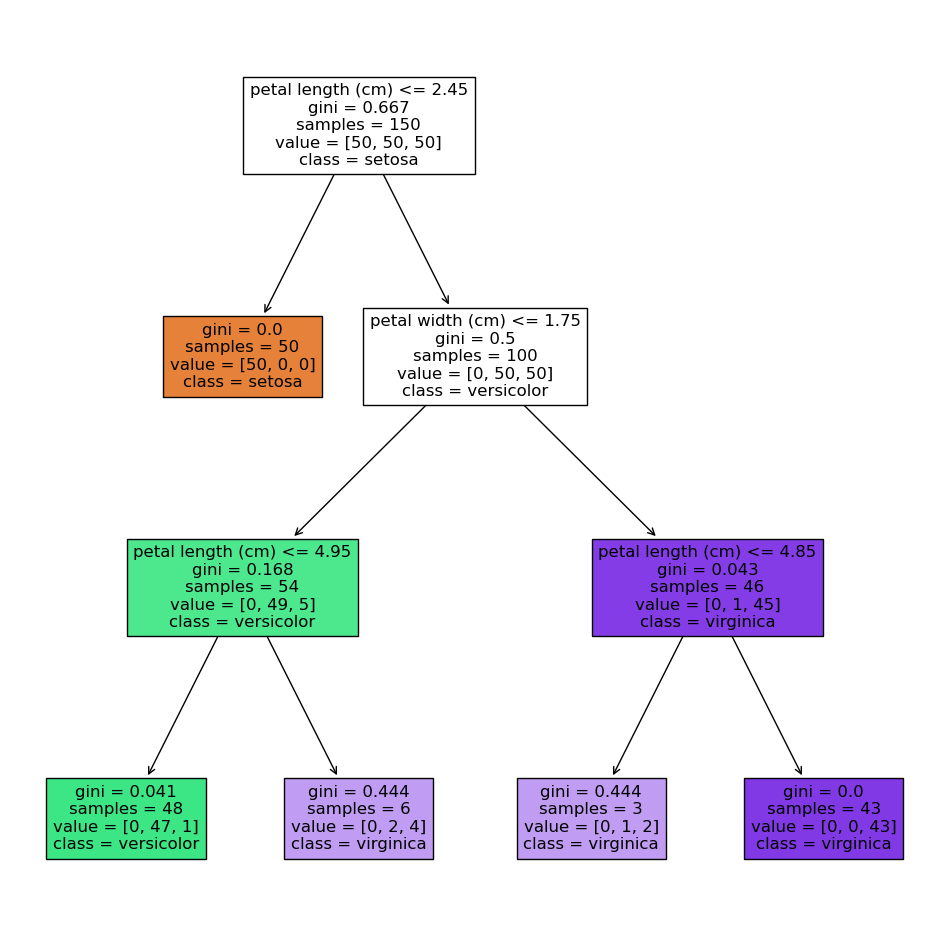

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 加载示例数据集
iris = load_iris()
X, y = iris.data, iris.target

# 训练一个决策树分类器
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

# 绘制决策树
plt.figure(figsize=(12,12))  # 设置画布大小
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


# 检查maddness3种模式的差异

In [55]:
import arg_settings
importlib.reload(module=arg_settings)
import torch
from defines import *
# 卸载modules再重新import
import modules
import importlib
importlib.reload(module=modules)


expData = arg_settings.TestData.to(arg_settings.Device)
# expData = arg_settings.TestData[:5].to(arg_settings.Device)
expLayer = modules.NimbusLinear(14, 3, bias=False).to(arg_settings.Device)
expLayer.set_state(NIMBUS_STATE_MATMUL_WITH_GRAD)
expLayer.prepare_record_once()
rslt = expLayer.forward(expData)

expLayer.load_recorded_input()
recorded = expLayer.recorded_input

# print("Input", expData)
# print("Output", rslt)
# print("Record", recorded)
# print("weight", expLayer.weight)
# print("weight shape: ", expLayer.weight.shape)
expLayer.learn_maddness_params(recorded)
# print("prototypes:\n", expLayer.prototypes)


expLayer.set_state(NIMBUS_STATE_RSLT_CHK)
rslt = expLayer.forward(expData)

target min tensor(0) target max tensor(2)
start nimbus linear init, in_features: 14 out_features: 32 bias: False state: 1 codeblockCount: -1 treeDepth: 4
start nimbus linear init, in_features: 32 out_features: 32 bias: False state: 1 codeblockCount: -1 treeDepth: 4
start nimbus linear init, in_features: 32 out_features: 3 bias: False state: 1 codeblockCount: -1 treeDepth: 4
start nimbus linear init, in_features: 14 out_features: 3 bias: False state: 1 codeblockCount: -1 treeDepth: 4
nimbus_linear_0 set state to 1 from 1
learn_proto_and_hash_function: (136245, 14) 7 16
init_and_learn_hash_function: (136245, 14) 7 16 start


  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    sel

learn_binary_tree_splits: X.shape:(136245, 2), K:16, return_prototypes:False, X_orig is None? False, check_x_dims:8, learn_quantize_params:False
__init__ of Bucket called: bucket_id 0
optimal_split_val of Bucket 0 called: x.shape:(136245, 2) 1 x_orig is none? False
optimal_split_val called with X.shape: (136245, 2) dim: 1 X_orig is None? False
_cumsses_cols called, X.shape:  (136245, 2)
_cumsses_cols called, X.shape:  (136245, 2)
optimal_split_val of Bucket 0 called: x.shape:(136245, 2) 0 x_orig is none? False
optimal_split_val called with X.shape: (136245, 2) dim: 0 X_orig is None? False
_cumsses_cols called, X.shape:  (136245, 2)
_cumsses_cols called, X.shape:  (136245, 2)
split of Bucket 0 called: x.shape: (136245, 2) dim: 1 val: 11.5, X_orig is None? False
__init__ of Bucket called: bucket_id 0
__init__ of Bucket called: bucket_id 1
optimal_split_val of Bucket 0 called: x.shape:(136245, 2) 1 x_orig is none? False
optimal_split_val called with X.shape: (113717, 2) dim: 1 X_orig is N

  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    sel

{'alpha': 1, 'copy_X': False, 'fit_intercept': False, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
After Ridge regression (136245, 14)-7-16(3.327 GB)
nimbus_linear_0 set state to 20 from 1
DMized mode encoding matrix: tensor([[[15],
         [ 4],
         [ 0],
         ...,
         [ 4],
         [ 4],
         [ 0]],

        [[15],
         [ 4],
         [ 0],
         ...,
         [ 4],
         [ 5],
         [ 0]],

        [[15],
         [ 4],
         [ 0],
         ...,
         [ 4],
         [ 5],
         [ 0]],

        ...,

        [[ 7],
         [ 8],
         [15],
         ...,
         [ 9],
         [ 0],
         [ 0]],

        [[ 7],
         [ 0],
         [15],
         ...,
         [ 0],
         [ 2],
         [ 0]],

        [[ 7],
         [ 0],
         [15],
         ...,
         [ 0],
         [ 2],
         [ 0]]], device='cuda:0')
maddness only encoded matrix: tensor([[[15

In [32]:
# 看看protos里面有没有本来就全0的
protos = expLayer.prototypes
projection = protos.sum(dim = 2)
print("projection shape: ", projection.shape)
print("projection:\n", projection)

projection shape:  torch.Size([7, 16])
projection:
 tensor([[ 3.5934e+03,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  3.1345e+04,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00],
        [-1.9177e+04,  3.8094e+02,  5.7759e+04,  9.6266e+03, -3.4137e+04,
         -2.2743e+03,  1.4475e+04,  4.9486e+02,  5.3022e+03,  1.3688e+04,
          1.6287e+04,  8.4599e+03, -7.1797e+03,  1.4688e+04,  1.6323e+04,
         -1.4837e+04],
        [ 3.1616e+03, -1.2505e+04,  1.4172e+03,  7.1959e+03,  7.7941e+03,
          8.7564e+03,  1.6677e+04,  3.0720e+04,  4.3743e+04,  4.4760e+04,
          6.2751e+04,  6.4637e+04,  7.1509e+04,  5.7710e+04,  9.8087e+04,
          6.7097e+04],
        [-4.1732e+04, -4.2584e+04, -9.2913e+04, -4.9531e+04, -2.9505e+04,
         -1.8823e+04,  6.8345e+03,  8.6474e+04, -1.4988e+04,  1.8572e+04,
          1.3382e+04,  2.9717e+04,  8.7299e+04,  0.0000e+00,  1.5

In [33]:
print("dims", expLayer.dims)
print("thresholds shape:", expLayer.thresholds.shape)
# print("thresholds", expLayer.thresholds)
print("lut shape:", expLayer.lut.shape)
# print("lut", expLayer.lut)

dims Parameter containing:
tensor([ 1,  1,  1,  1,  2,  2,  2,  2,  5,  5,  5,  5,  6,  6,  6,  6,  8,  8,
         8,  8, 10, 11, 10, 11, 13, 13, 13, 13], device='cuda:0')
thresholds shape: torch.Size([105, 1])
lut shape: torch.Size([7, 16, 3])


In [16]:
print("prototypes:\n", expLayer.all_prototypes)

AttributeError: 'NimbusLinear' object has no attribute 'all_prototypes'

In [17]:
import math_func

S_all, T_all, LUT_all  = math_func.create_maddness_supporters(expData.to('cpu'))
print("S_all shape: ", S_all.shape)
print("T_all shape: ", T_all.shape)
print("LUT_all shape: ", LUT_all.shape)

S_all shape:  torch.Size([7, 2, 15])
T_all shape:  torch.Size([7, 15])
LUT_all shape:  torch.Size([7, 16, 2])


In [18]:
S_all[5]

tensor([[1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.]])

## 测试numpy方法

In [20]:
import numpy as np
from sklearn.linear_model import Ridge
import numba
import torch


@numba.njit(fastmath=True, cache=True, parallel=False)
def _cumsse_cols(X):
    # TODO: can be optimized with numpy
    N, D = X.shape
    cumsses = np.empty((N, D), X.dtype)
    cumX_column = np.empty(D, X.dtype)
    cumX2_column = np.empty(D, X.dtype)
    for j in range(D):
        cumX_column[j] = X[0, j]
        cumX2_column[j] = X[0, j] * X[0, j]
        cumsses[0, j] = 0  # no err in bucket with 1 element
    for i in range(1, N):
        one_over_count = 1.0 / (i + 1)
        for j in range(D):
            cumX_column[j] += X[i, j]
            cumX2_column[j] += X[i, j] * X[i, j]
            meanX = cumX_column[j] * one_over_count
            cumsses[i, j] = cumX2_column[j] - (cumX_column[j] * meanX)
    return cumsses


def optimal_split_val(X, dim, X_orig=None):
    X_orig = X if X_orig is None else X_orig
    if X_orig.shape != X.shape:
        assert X_orig.shape == X.shape

    if X.shape[0] == 0:
        return dim, 0, 100000000000000000000

    N, _ = X.shape
    sort_idxs = np.argsort(X_orig[:, dim])
    X_sort = X[sort_idxs]

    # cumulative SSE (sum of squared errors)
    sses_head = _cumsse_cols(X_sort)
    sses_tail = _cumsse_cols(X_sort[::-1])[::-1]
    sses = sses_head
    sses[:-1] += sses_tail[1:]
    sses = sses.sum(axis=1)

    best_idx = np.argmin(sses)
    next_idx = min(N - 1, best_idx + 1)
    col = X[:, dim]
    best_val = (col[sort_idxs[best_idx]] + col[sort_idxs[next_idx]]) / 2

    return dim, best_val, sses[best_idx]


def get_sub_bucket(X):
    best_bucket = 0, 0, 100000000000000000000
    for i in range(X.shape[1]):
        bucket = optimal_split_val(X, i)
        if bucket[-1] < best_bucket[-1]:
            best_bucket = bucket
    return best_bucket


def get_ans(X):
    buckets = []
    prototypes = []
    buckets.append(X)
    beg = 0
    end = 1
    ans = []
    for i in range(15):
        best_bucket = get_sub_bucket(buckets[beg])

        X1 = buckets[beg][buckets[beg][:, best_bucket[0]] <= best_bucket[1]]
        X2 = buckets[beg][buckets[beg][:, best_bucket[0]] > best_bucket[1]]
        if X1.shape[0] == 0:
            buckets.append(X2)
            buckets.append(X2)
        elif X2.shape[0] == 0:
            buckets.append(X1)
            buckets.append(X1)
        else:
            buckets.append(X1)
            buckets.append(X2)
        end += 2
        beg += 1

        ans.append(best_bucket)
    for i in range(15, len(buckets)):
        prototypes.append(np.mean(buckets[i], axis=0))
    return ans, prototypes

In [21]:
train_data = expData

D = 2
S_all = np.zeros((train_data.shape[1] // D, D, 15))
T_all = np.zeros((train_data.shape[1] // D, 15))
LUT_all = np.zeros((train_data.shape[1] // D, 16, D))
for i in range(0, train_data.shape[1], D):
    # print(i)
    X = train_data[:, i:i+D]
    # print(X)
    # X = np.random.rand(100, D)
    # print(X.shape)
    ans, prototypes = get_ans(X.to('cpu').numpy())
    # print(ans)
    # print(prototypes)
    for j in range(15):
        S_all[i // D, ans[j][0], j] = 1
        T_all[i // D, j] = ans[j][1]
    for j in range(16):
        LUT_all[i // D, j] = prototypes[j]

In [22]:
S_all.shape, T_all.shape, LUT_all.shape

((7, 2, 15), (7, 15), (7, 16, 2))

In [24]:
S_all[3]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**得到结果：无论对于S all的第几个c（0-6），都是一样的值：**
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
所以大概率这里的计算有问题！

In [ ]:
T_all

array([[5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00],
       [3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02,
        3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02,
        3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02],
       [1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02,
        1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02,
        1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02, 1.28000e+02],
       [3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02,
        3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02,
        3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02, 3.98000e+02],
       [4.83968e+05, 4.33024e+05, 5.34912e+05, 4.07552e+05, 4.58496e+05,
        5.09440e+05, 5.85856e+05, 4.07552e+05, 

In [ ]:
LUT_all

array([[[5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01],
        [5.00000e+00, 1.70000e+01]],

       [[3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00000e+00],
        [3.98000e+02, 0.00

# 尝试结合arg settings和console当中的params

In [ ]:
import sys


sys.argv = ['--hidden_size1', '32', '--hidden_size2', '32']


import arg_settings

usage: --hidden_size1 [-h] [--hidden_size1 HIDDEN_SIZE1]
                      [--hidden_size2 HIDDEN_SIZE2]
                      [--learning_rate LEARNING_RATE]
                      [--batch_size BATCH_SIZE] [--epochs EPOCHS]
                      [--weight_decay WEIGHT_DECAY] [--momentum MOMENTUM]
                      [--device DEVICE] [--optimizer OPTIMIZER]
                      [--lr_scheduler LR_SCHEDULER] [--criterion CRITERION]
                      [--model MODEL] [--dataset DATASET]
--hidden_size1: error: unrecognized arguments: 32


SystemExit: 2

In [ ]:
arg_settings.TestData.shape

NameError: name 'arg_settings' is not defined

# 决策树MNIST实验

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)  # 转换标签为整型

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


/tmp/ipykernel_216660/2204734843.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # 转换标签为整型


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,  # 树的最大深度
    'eta': 0.1,      # 学习率
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 10  # 类别数，因为是 MNIST 所以是 10
}
num_rounds = 50

bst = xgb.train(params, dtrain, num_rounds)

# 预测测试集结果
preds = bst.predict(dtest)
predictions = np.asarray([np.round(val) for val in preds])
accuracy = accuracy_score(y_test, predictions)
print("测试准确率: {:.2f}%".format(accuracy * 100))



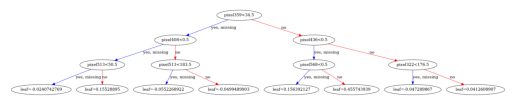

In [ ]:
import matplotlib.pyplot as plt


xgb.plot_tree(bst, num_trees=0)
plt.show()


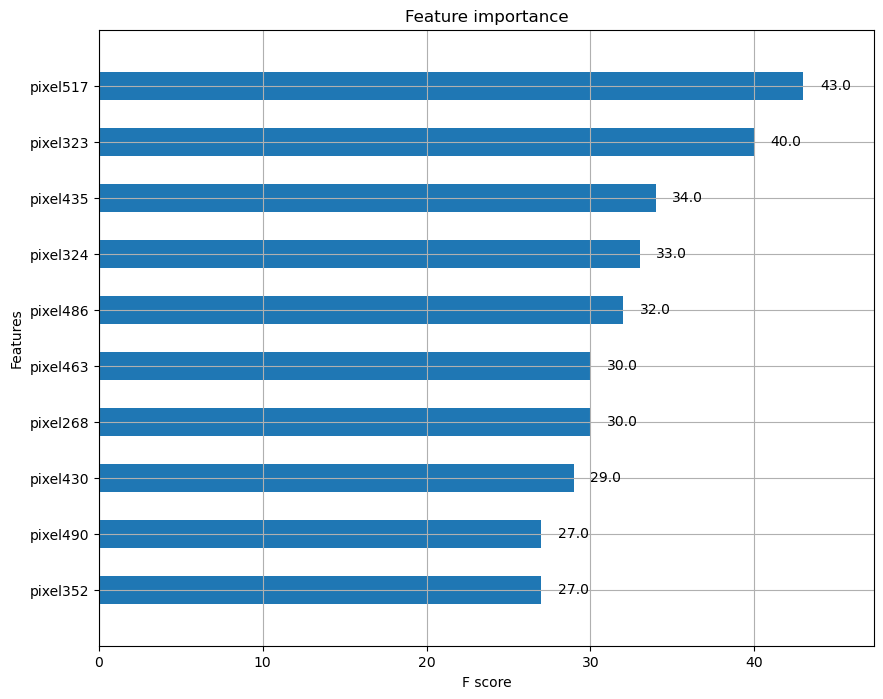

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # 设置图形尺寸
xgb.plot_importance(bst, max_num_features=10, height=0.5, ax=ax)  # 仅显示重要性最高的10个特征
plt.show()


In [ ]:
from xgboost import cv

params['max_depth'] = 10  # 示例深度
cv_results = cv(params, dtrain, num_boost_round=50, nfold=3, metrics={'merror'}, early_stopping_rounds=10)
print(cv_results)


    train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0            0.055464      8.047499e-04          0.113411         0.002285
1            0.042411      3.271295e-03          0.092071         0.004377
2            0.032598      9.313287e-04          0.080018         0.003516
3            0.026696      5.618320e-04          0.072554         0.002494
4            0.024045      4.157433e-04          0.069929         0.002227
5            0.022098      2.961064e-04          0.067339         0.002298
6            0.020741      3.564076e-04          0.065000         0.002080
7            0.019027      3.363186e-04          0.063696         0.002564
8            0.017598      4.051923e-04          0.062357         0.002671
9            0.016348      4.495715e-04          0.061089         0.002395
10           0.015089      2.457826e-04          0.059929         0.002414
11           0.013929      2.868539e-04          0.058339         0.002164
12           0.012804    

## 使用gpu版决策树

/tmp/ipykernel_253755/2360186988.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)  # 转换标签为整型


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:04:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:04:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:05:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


测试准确率: 97.38%


NameError: name 'plt' is not defined

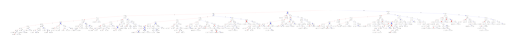

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)  # 转换标签为整型

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# 加载数据，假设已经有 dtrain 和 dtest

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'max_depth': 25,  # 设置树的最大深度
    'eta': 0.3,  # 学习率
    'objective': 'multi:softmax',  # 目标函数
    'num_class': 10,  # 类别数，MNIST 为 10
    'tree_method': 'gpu_hist',  # 使用 GPU 直方图算法
    'predictor': 'gpu_predictor',  # 预测时使用 GPU
}

num_rounds = 100

# 训练模型
bst = xgb.train(params, dtrain, num_rounds)

# 预测
preds = bst.predict(dtest)
print("测试准确率: {:.2f}%".format(accuracy_score(y_test, preds) * 100))




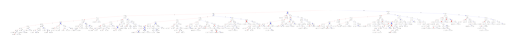

/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:07:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/futou/anaconda3/envs/halutmatmul/lib/

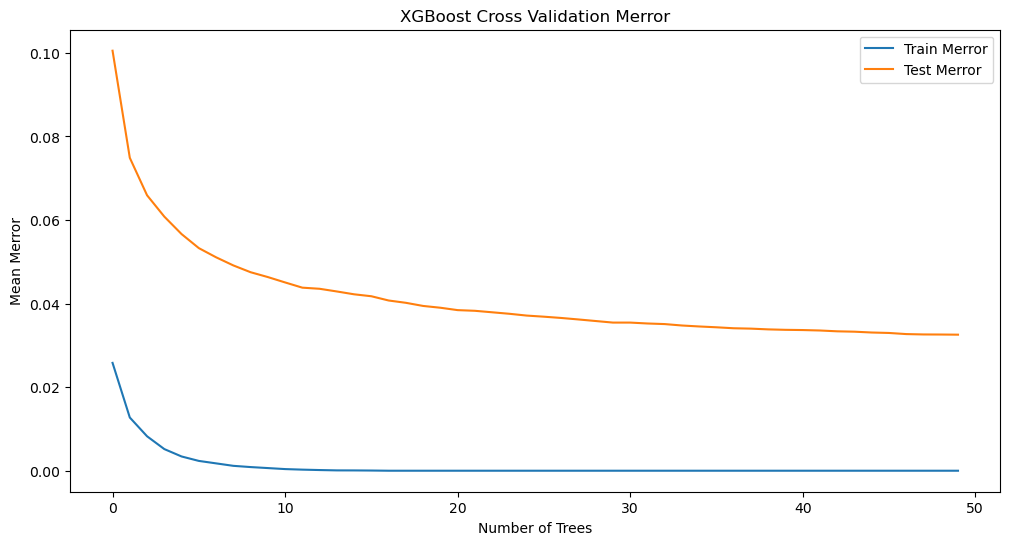

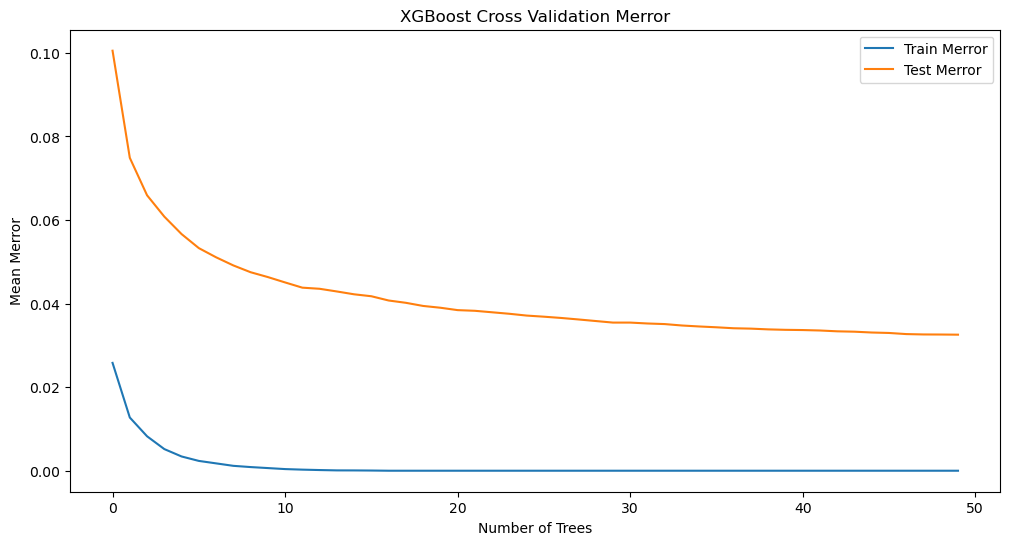

In [ ]:
import matplotlib.pyplot as plt
from xgboost import cv

# 把树画出来
xgb.plot_tree(bst, num_trees=0)

plt.show()

cv_results = cv(params, dtrain, num_boost_round=50, nfold=3, metrics={'merror'}, early_stopping_rounds=10)
# 绘制训练和验证误差
plt.figure(figsize=(12, 6))
plt.plot(cv_results['train-merror-mean'], label='Train Merror')
plt.plot(cv_results['test-merror-mean'], label='Test Merror')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Merror')
plt.title('XGBoost Cross Validation Merror')
plt.legend()
plt.show()

# 绘制训练和验证误差
plt.figure(figsize=(12, 6))
plt.plot(cv_results['train-merror-mean'], label='Train Merror')
plt.plot(cv_results['test-merror-mean'], label='Test Merror')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Merror')
plt.title('XGBoost Cross Validation Merror')
plt.legend()
plt.show()

# dim测试

In [ ]:
import torch

# 示例张量
input = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# 索引张量
index = torch.tensor([
    [0, 1, 1],  # 从第一行选择索引0, 1, 1的元素
    [2, 0, 1],  # 从第二行选择索引2, 0, 1的元素
    [1, 2, 0]   # 从第三行选择索引1, 2, 0的元素
])

# 在dim=1的维度上收集数据（按行收集）
output = torch.gather(input, 1, index)
print(output)


# 在dim=0的维度上收集数据（按列收集）
output = torch.gather(input, 0, index)
print(output)


tensor([[1, 2, 2],
        [6, 4, 5],
        [8, 9, 7]])
tensor([[1, 5, 6],
        [7, 2, 6],
        [4, 8, 3]])


In [ ]:
# 写两个3d的tensor来测试gather中的dim参数
input = torch.tensor([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ]
])

index = torch.tensor([
    [
        [0, 1, 1],
        [2, 0, 1],
        [1, 2, 0]
    ],
    [
        [2, 0, 1],
        [1, 2, 0],
        [0, 1, 1]
    ]
])

# 在dim=1的维度上收集数据
output = torch.gather(input, 1, index)
print(output)

# 在dim=2的维度上收集数据
output = torch.gather(input, 2, index)
print(output)

tensor([[[ 1,  5,  6],
         [ 7,  2,  6],
         [ 4,  8,  3]],

        [[16, 11, 15],
         [13, 17, 12],
         [10, 14, 15]]])
tensor([[[ 1,  2,  2],
         [ 6,  4,  5],
         [ 8,  9,  7]],

        [[12, 10, 11],
         [14, 15, 13],
         [16, 17, 17]]])


In [ ]:
input.shape

torch.Size([2, 3, 3])

In [ ]:
raw = torch.tensor(range(105))
raw.view(-1,7)

tensor([[  0,   1,   2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11,  12,  13],
        [ 14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 28,  29,  30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39,  40,  41],
        [ 42,  43,  44,  45,  46,  47,  48],
        [ 49,  50,  51,  52,  53,  54,  55],
        [ 56,  57,  58,  59,  60,  61,  62],
        [ 63,  64,  65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74,  75,  76],
        [ 77,  78,  79,  80,  81,  82,  83],
        [ 84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97],
        [ 98,  99, 100, 101, 102, 103, 104]])

In [ ]:
raw.view(4,3)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [ ]:
x = torch.randn(2, 3, 4)
y = torch.transpose(x, 1, 2)
print(x)  # torch.Size([2, 3, 4])
print(y)  

tensor([[[ 1.4063,  0.8892, -0.8758, -1.2189],
         [-2.9158,  0.5124,  1.0671, -0.3963],
         [ 0.1960,  0.9498, -0.2120,  0.3937]],

        [[ 0.5181, -1.1240, -0.7715, -0.6984],
         [-1.2636,  1.1718, -1.0486, -0.5931],
         [-1.3399, -0.6506, -1.0754,  1.8514]]])
tensor([[[ 1.4063, -2.9158,  0.1960],
         [ 0.8892,  0.5124,  0.9498],
         [-0.8758,  1.0671, -0.2120],
         [-1.2189, -0.3963,  0.3937]],

        [[ 0.5181, -1.2636, -1.3399],
         [-1.1240,  1.1718, -0.6506],
         [-0.7715, -1.0486, -1.0754],
         [-0.6984, -0.5931,  1.8514]]])


In [ ]:
ravel = x.ravel()
print(ravel)

tensor([ 1.4063,  0.8892, -0.8758, -1.2189, -2.9158,  0.5124,  1.0671, -0.3963,
         0.1960,  0.9498, -0.2120,  0.3937,  0.5181, -1.1240, -0.7715, -0.6984,
        -1.2636,  1.1718, -1.0486, -0.5931, -1.3399, -0.6506, -1.0754,  1.8514])


In [ ]:
unravel = ravel.view(2,4,3)
print(unravel)

tensor([[[ 1.4063,  0.8892, -0.8758],
         [-1.2189, -2.9158,  0.5124],
         [ 1.0671, -0.3963,  0.1960],
         [ 0.9498, -0.2120,  0.3937]],

        [[ 0.5181, -1.1240, -0.7715],
         [-0.6984, -1.2636,  1.1718],
         [-1.0486, -0.5931, -1.3399],
         [-0.6506, -1.0754,  1.8514]]])


# 测试torch版本的分桶

In [ ]:
import torch

def _cumsse_cols_torch(X):
    N, D = X.shape
    # 计算累积和与累积平方和
    cumX_column = torch.cumsum(X, dim=0)
    cumX2_column = torch.cumsum(X * X, dim=0)

    # 计算每一行的均值
    counts = torch.arange(1, N+1, dtype=torch.float32).unsqueeze(1)  # 转换为列向量
    meanX = cumX_column / counts

    # 计算累积平方误差
    cumsses = cumX2_column - (cumX_column * meanX)

    # 第一行错误为0
    cumsses[0, :] = 0

    return cumsses

def optimal_split_val_torch(X, dim, X_orig=None):
    if X_orig is None:
        X_orig = X
    assert X_orig.shape == X.shape

    if X.shape[0] == 0:
        return dim, 0, float('inf')

    # 排序
    sort_idxs = torch.argsort(X_orig[:, dim])
    X_sort = X[sort_idxs]

    # 计算累积平方误差
    sses_head = _cumsse_cols_torch(X_sort)
    sses_tail = _cumsse_cols_torch(X_sort.flip(dims=[0])).flip(dims=[0])
    sses = sses_head
    sses[:-1] += sses_tail[1:]
    sses_total = sses.sum(dim=1)

    # 找到最小 SSE 的索引
    best_idx = torch.argmin(sses_total)
    next_idx = min(X.shape[0] - 1, best_idx + 1)
    col = X[:, dim]
    best_val = (col[sort_idxs[best_idx]] + col[sort_idxs[next_idx]]) / 2

    return dim, best_val.item(), sses_total[best_idx].item()

def get_sub_bucket_torch(X):
    best_bucket = (0, 0, float('inf'))
    for i in range(X.shape[1]):
        bucket = optimal_split_val_torch(X, i)
        if bucket[-1] < best_bucket[-1]:
            best_bucket = bucket
    return best_bucket

def get_ans_torch(X):
    buckets = []
    prototypes = []
    buckets.append(X)
    beg = 0
    end = 1
    ans = []
    
    for i in range(15):
        best_bucket = get_sub_bucket_torch(buckets[beg])

        X1 = buckets[beg][buckets[beg][:, best_bucket[0]] <= best_bucket[1]]
        X2 = buckets[beg][buckets[beg][:, best_bucket[0]] > best_bucket[1]]
        if X1.shape[0] == 0:
            buckets.append(X2)
            buckets.append(X2)
        elif X2.shape[0] == 0:
            buckets.append(X1)
            buckets.append(X1)
        else:
            buckets.append(X1)
            buckets.append(X2)
        end += 2
        beg += 1

        ans.append(best_bucket)

    for i in range(15, len(buckets)):
        if buckets[i].shape[0] > 0:
            prototypes.append(torch.mean(buckets[i], dim=0))
        else:
            prototypes.append(torch.zeros(X.shape[1]))

    return ans, prototypes

def create_maddness_supporters(train_data):
    D = 2
    S_all = torch.zeros((train_data.shape[1] // D, D, 15))
    T_all = torch.zeros((train_data.shape[1] // D, 15))
    LUT_all = torch.zeros((train_data.shape[1] // D, 16, D))
    
    for i in range(0, train_data.shape[1], D):
        X = train_data[:, i:i+D]
        ans, prototypes = get_ans_torch(X)
        for j in range(15):
            S_all[i // D, ans[j][0], j] = 1
            T_all[i // D, j] = ans[j][1]
        for j in range(16):
            LUT_all[i // D, j] = prototypes[j]

    return S_all, T_all, LUT_all

In [ ]:
X = torch.tensor([
    [1.0, 2.0],
    [2.0, 1.5],
    [3.0, 4.5],
    [4.0, 3.5]
], dtype=torch.float32)


In [ ]:
ans, prototypes = get_ans_torch(X)
print(f"ans: {ans}, prototypes: {prototypes}")

ans: [(0, 2.5, 1.625), (0, 1.5, 0.0), (0, 3.5, 0.0), (0, 1.0, 0.0), (0, 2.0, 0.0), (0, 3.0, 0.0), (0, 4.0, 0.0), (0, 1.0, 0.0), (0, 1.0, 0.0), (0, 2.0, 0.0), (0, 2.0, 0.0), (0, 3.0, 0.0), (0, 3.0, 0.0), (0, 4.0, 0.0), (0, 4.0, 0.0)], prototypes: [tensor([1., 2.]), tensor([1., 2.]), tensor([1., 2.]), tensor([1., 2.]), tensor([2.0000, 1.5000]), tensor([2.0000, 1.5000]), tensor([2.0000, 1.5000]), tensor([2.0000, 1.5000]), tensor([3.0000, 4.5000]), tensor([3.0000, 4.5000]), tensor([3.0000, 4.5000]), tensor([3.0000, 4.5000]), tensor([4.0000, 3.5000]), tensor([4.0000, 3.5000]), tensor([4.0000, 3.5000]), tensor([4.0000, 3.5000])]


In [ ]:
dim, best_val, min_error = optimal_split_val_torch(X, 0)
print(f"Best split for dimension {dim} is at value {best_val} with minimum error {min_error}")


Best split for dimension 0 is at value 2.5 with minimum error 1.625
